In [1]:
#-----------------------------------------------------------------------------------------------------------
import time as t
import datetime
from datetime import datetime, timedelta, date 
from dateutil.relativedelta import *
from netCDF4 import Dataset   
import glob
import requests 
import pandas as pd
import xarray as xr
import requests 
import functools
import operator
import wget
import os
import gc
import numpy as np
import pygrib
import xarray as xr
from scipy.interpolate import griddata


import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import shapefile
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import cartopy, cartopy.crs as ccrs   
import regionmask
from shapely.geometry import Point, Polygon

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker 
import scipy.ndimage as ndimage
from PIL import Image
from glob import glob

import matplotlib.colors as colors
import matplotlib

import urllib.request
from metpy.units import units

import time as t
from datetime import datetime, timedelta, date 
import datetime
#-----METPY---------------------
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, '/mnt/c/scripts/tools/')
from bigquery_bucket_tools import *
from plot_tools import *
from tools import *


In [2]:
#Dados da previsão
files= glob.glob('/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_*.grb2')
li = sorted(files)


data_list = []


for q in li:
   
    dataset = xr.open_dataset(q)

    dataset = dataset.swap_dims({"step": "valid_time"}).drop(['step']) 

    strf = dataset['strf'] #separa cada arquivo pelo start_time

    data_list.append(strf)

    

files_prev = xr.combine_nested(data_list,concat_dim=['time'],join='inner') #previsões em comum 

#media entre os arquivos de previsão
ds_mean = files_prev.mean(dim='time')


# Média das previsões para os meses completos, excluindo o primeiro e o ultimo mês 
ds_mean = ds_mean.resample(valid_time="1MS").mean(dim="valid_time")[1:-1,:,:]


In [59]:
#PARTE I


In [2]:
clima = xr.open_dataset('/mnt/c/scripts/temas/stream_plot/psi_850/climatologia_psi_200.grb2')


In [16]:
#interpolação 
ds_mean = ds_mean.interp(longitude=clima.longitude,latitude=clima.latitude)

In [ ]:
clima_sel = clima.sel(latitude = -23.60, longitude = 313.33,method = 'nearest')
clima_sel

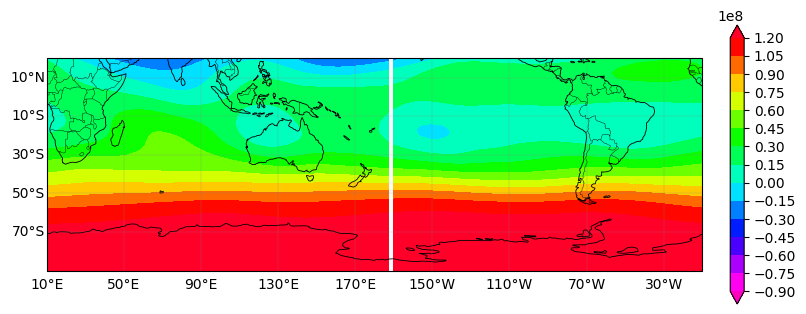

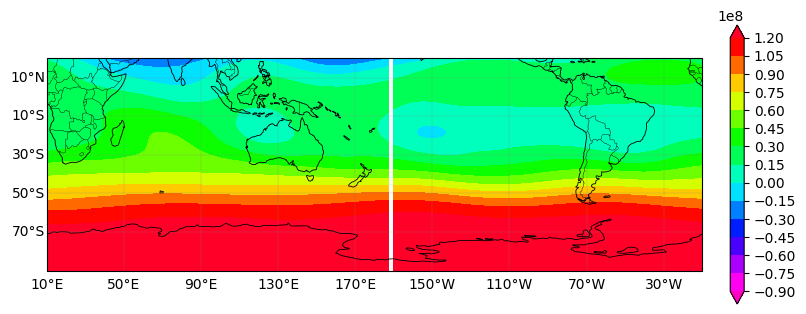

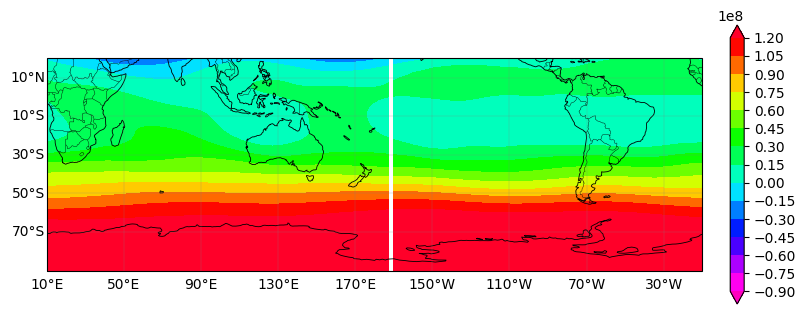

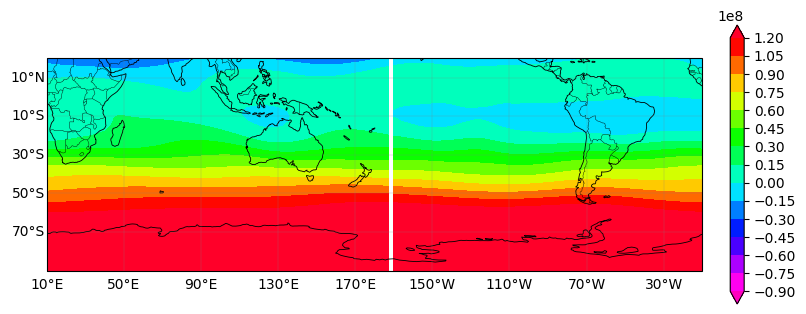

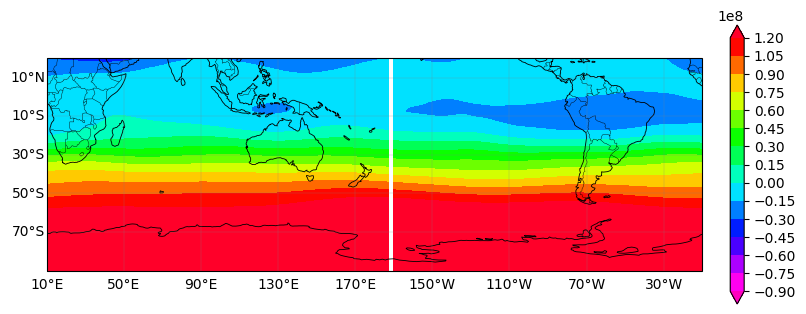

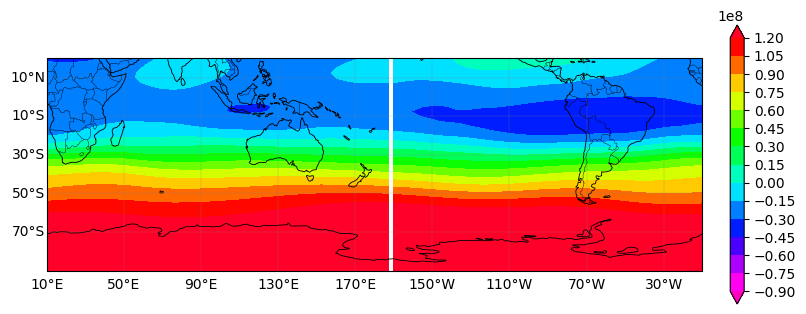

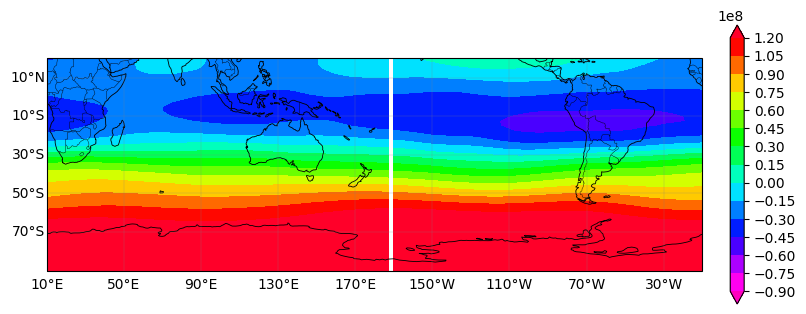

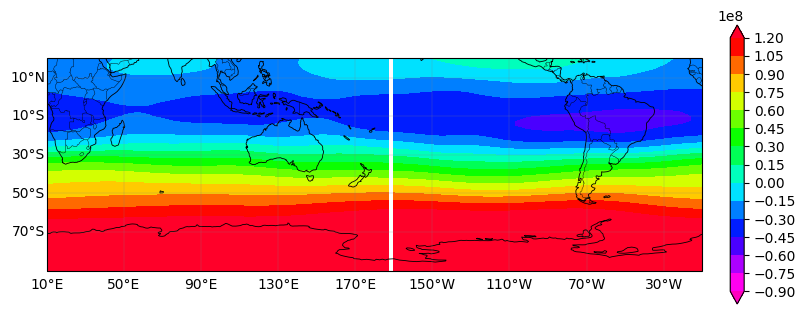

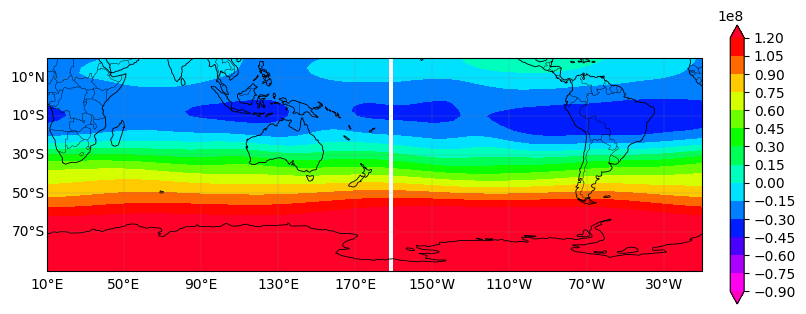

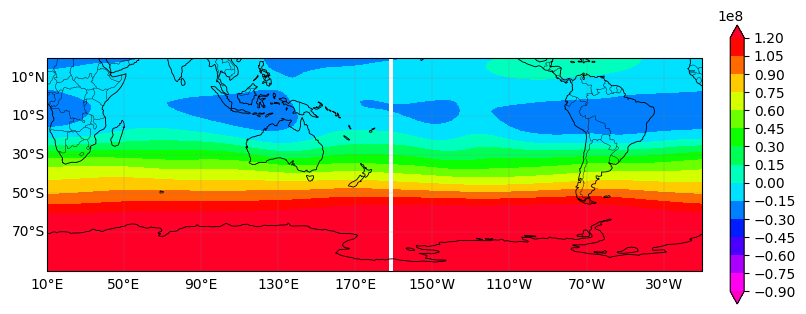

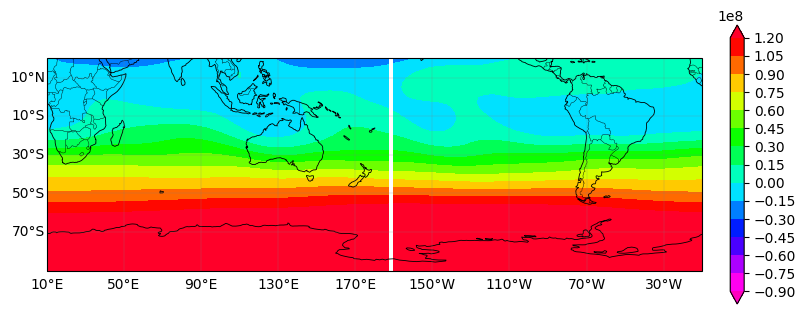

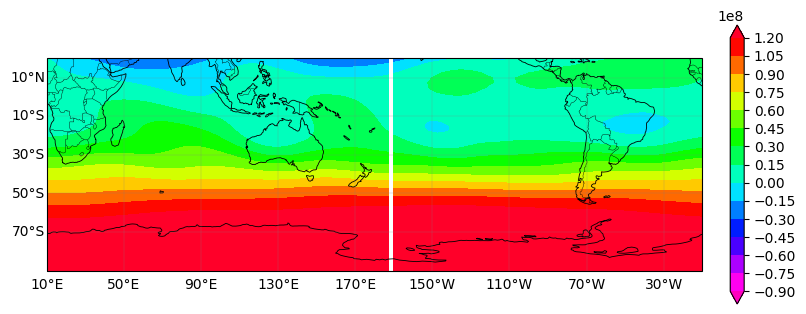

In [20]:

for mes in np.arange(1,13):

      clima_1 = clima.strf.sel(month=mes)

      lats = 20
      latn = -110
      lon1 = 160  
      lon2 = -180   

      plt.figure(figsize=[9,6])                            

      proj = ccrs.PlateCarree(central_longitude=190)    

      ax = plt.axes(projection=proj)   

      ax.set_extent([lon1, lon2, lats, latn], proj)  

      ax.coastlines( color='black',linewidth=0.6)

      ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.3)


      gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                        xlocs=np.arange(-150,180,40), ylocs=np.arange(-90, 40,20), 
                        x_inline=False, y_inline=False, linewidth=0.33, color='gray',alpha=0.5)


      interval = 1.5*1e7
      levels = np.arange(-9*1e7,1.2*1e8+interval,interval)


      cf = ax.contourf(clima_1.longitude,clima_1.latitude, clima_1,levels=levels, cmap='gist_rainbow_r', extend='both')
      cb2=plt.colorbar(cf,fraction=0.02,ticks=levels, pad=0.04)



      gl.right_labels = False
      gl.top_labels = False

In [86]:
mes_1 = ds_mean.sel(valid_time='2023-12-01T00:00:00.000000000')
mes_1

<xarray.DataArray 'strf' (latitude: 181, longitude: 360)>
array([[-1.5233781e+08, -1.5233781e+08, -1.5233781e+08, ...,
        -1.5233781e+08, -1.5233781e+08, -1.5233781e+08],
       [-1.5240037e+08, -1.5240528e+08, -1.5241006e+08, ...,
        -1.5238506e+08, -1.5239030e+08, -1.5239512e+08],
       [-1.5236064e+08, -1.5237106e+08, -1.5238152e+08, ...,
        -1.5232990e+08, -1.5234010e+08, -1.5235034e+08],
       ...,
       [ 1.4644430e+08,  1.4644074e+08,  1.4643750e+08, ...,
         1.4645501e+08,  1.4645126e+08,  1.4644770e+08],
       [ 1.4669770e+08,  1.4669557e+08,  1.4669421e+08, ...,
         1.4670307e+08,  1.4670126e+08,  1.4669941e+08],
       [ 1.4692381e+08,  1.4692381e+08,  1.4692381e+08, ...,
         1.4692381e+08,  1.4692381e+08,  1.4692381e+08]], dtype=float32)
Coordinates:
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    isobaricInhPa  float64 200.0
    valid_time     datetime64[ns] 2023-12-01

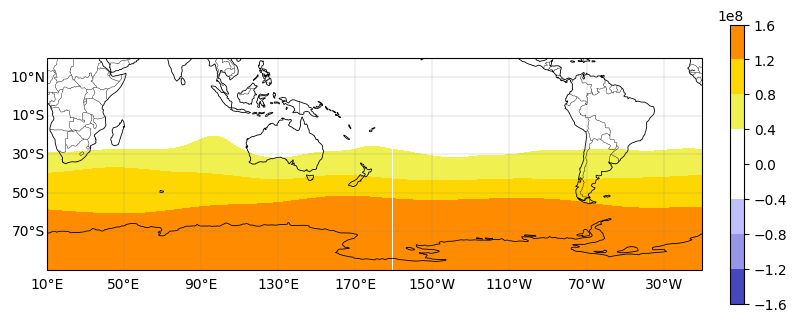

In [87]:
mes_1 = ds_mean.sel(valid_time='2023-12-01T00:00:00.000000000')



lats = 20
latn = -110
lon1 = 160  
lon2 = -180   

plt.figure(figsize=[9,6])                            

proj = ccrs.PlateCarree(central_longitude=190)    

ax = plt.axes(projection=proj)   

ax.set_extent([lon1, lon2, lats, latn], proj)  

ax.coastlines( color='black',linewidth=0.6)

ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.3)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                  xlocs=np.arange(-150,180,40), ylocs=np.arange(-90, 40,20), 
                  x_inline=False, y_inline=False, linewidth=0.33, color='gray',alpha=0.5)

colors = ['#4646be','#9696e6','#aaaaf2','#bfbfff','#ffffff','#ffffff','#f0f050','#ffff00','#ffd700', '#ff8c00']
            

cmap = matplotlib.colors.ListedColormap(colors)

cmap.set_over('#663800')

cmap.set_under('#23235f')


cf = ax.contourf(mes_1.longitude,mes_1.latitude, mes_1, cmap=cmap)
cb2=plt.colorbar(cf,fraction=0.02, pad=0.04)



gl.right_labels = False
gl.top_labels = False

In [56]:
dif = clima_1 - mes_1
dif

<xarray.DataArray 'strf' (latitude: 73, longitude: 144)>
array([[ 2212960.,  2212960.,  2212960., ...,  2212960.,  2212960.,
         2212960.],
       [ 2256776.,  2290276.,  2323440., ...,  2157036.,  2190056.,
         2223520.],
       [ 2437712.,  2512016.,  2585616., ...,  2210072.,  2286240.,
         2362192.],
       ...,
       [-4036624., -4048304., -4064208., ..., -4027584., -4026080.,
        -4029064.],
       [-4409224., -4413192., -4418536., ..., -4407120., -4406400.,
        -4407064.],
       [-4924960., -4924960., -4924960., ..., -4924960., -4924960.,
        -4924960.]])
Coordinates:
    isobaricInhPa  float64 200.0
  * latitude       (latitude) float64 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude      (longitude) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
    month          int64 12
    valid_time     datetime64[ns] 2023-12-01

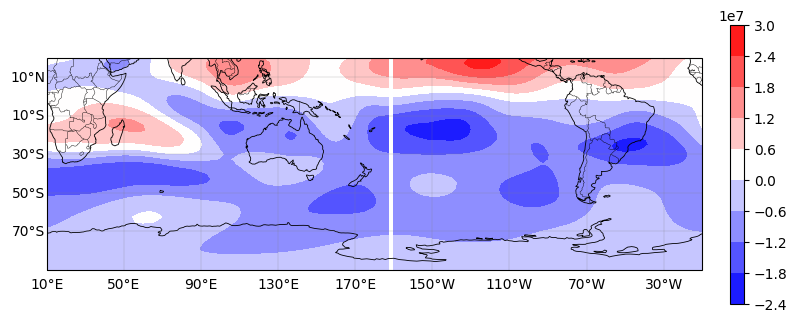

In [58]:
mes_1 = ds_mean.sel(valid_time='2023-08-01T00:00:00.000000000')



lats = 20
latn = -110
lon1 = 160  
lon2 = -180   

plt.figure(figsize=[9,6])                            

proj = ccrs.PlateCarree(central_longitude=190)    

ax = plt.axes(projection=proj)   

ax.set_extent([lon1, lon2, lats, latn], proj)  

ax.coastlines( color='black',linewidth=0.6)

ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.3)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                  xlocs=np.arange(-150,180,40), ylocs=np.arange(-90, 40,20), 
                  x_inline=False, y_inline=False, linewidth=0.33, color='gray',alpha=0.5)

colors = ['#4646be','#9696e6','#aaaaf2','#bfbfff','#ffffff','#ffffff','#f0f050','#ffff00','#ffd700', '#ff8c00']
            

cmap = matplotlib.colors.ListedColormap(colors)

cmap.set_over('#663800')

cmap.set_under('#23235f')


cf = ax.contourf(dif.longitude,dif.latitude, dif, cmap='bwr')
cb2=plt.colorbar(cf,fraction=0.02, pad=0.04)



gl.right_labels = False
gl.top_labels = False

In [ ]:
#PARTE II 


In [60]:
files= glob.glob('/mnt/c/scripts/temas/stream_plot/psi_200/anomalia/psi200_01_*.grb2')
li = sorted(files)


data_list = []


for q in li:
   
    dataset = xr.open_dataset(q)

    dataset = dataset.swap_dims({"step": "valid_time"}).drop(['step']) 

    strf = dataset['strf'] #separa cada arquivo pelo start_time

    data_list.append(strf)

    

files_prev = xr.combine_nested(data_list,concat_dim=['time'],join='inner') #previsões em comum 

#media entre os arquivos de previsão
ds_mean = files_prev.mean(dim='time')


# Média das previsões para os meses completos, excluindo o primeiro e o ultimo mês 
ds_mean = ds_mean.resample(valid_time="1MS").mean(dim="valid_time")[1:-1,:,:]


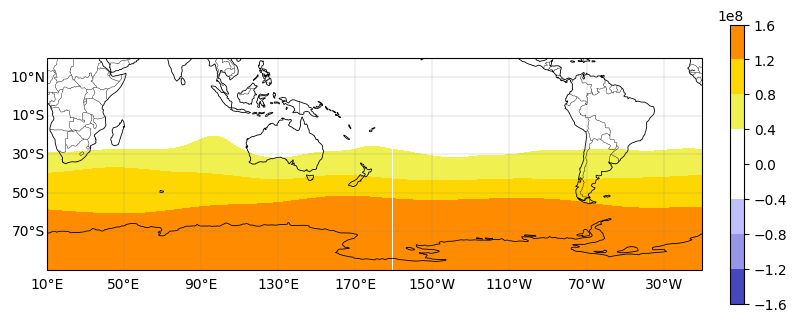

In [74]:
mes_1 = ensemble.sel(month=12)

lats = 20
latn = -110
lon1 = 160  
lon2 = -180   

plt.figure(figsize=[9,6])                            

proj = ccrs.PlateCarree(central_longitude=190)    

ax = plt.axes(projection=proj)   

ax.set_extent([lon1, lon2, lats, latn], proj)  

ax.coastlines( color='black',linewidth=0.6)

ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.3)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                  xlocs=np.arange(-150,180,40), ylocs=np.arange(-90, 40,20), 
                  x_inline=False, y_inline=False, linewidth=0.33, color='gray',alpha=0.5)


cf = ax.contourf(mes_1.longitude,mes_1.latitude, mes_1, cmap= cmap)
cb2=plt.colorbar(cf,fraction=0.02, pad=0.04)



gl.right_labels = False
gl.top_labels = False


In [82]:
fim  =  mes_1  - clima_1 
fim

<xarray.DataArray 'strf' (latitude: 37, longitude: 72)>
array([[-2212960., -2212960., -2212960., ..., -2212960., -2212960.,
        -2212960.],
       [-2437712., -2585616., -2728368., ..., -1981744., -2133728.,
        -2286240.],
       [-3002336., -3357344., -3688400., ..., -1854432., -2240000.,
        -2627056.],
       ...,
       [ 4212432.,  4259072.,  4346224., ...,  4360336.,  4264144.,
         4214064.],
       [ 4036624.,  4064208.,  4106848., ...,  4059456.,  4033536.,
         4026080.],
       [ 4924960.,  4924960.,  4924960., ...,  4924960.,  4924960.,
         4924960.]], dtype=float32)
Coordinates:
  * latitude       (latitude) float64 90.0 85.0 80.0 75.0 ... -80.0 -85.0 -90.0
  * longitude      (longitude) float64 0.0 5.0 10.0 15.0 ... 345.0 350.0 355.0
    isobaricInhPa  float64 200.0
    month          int64 12

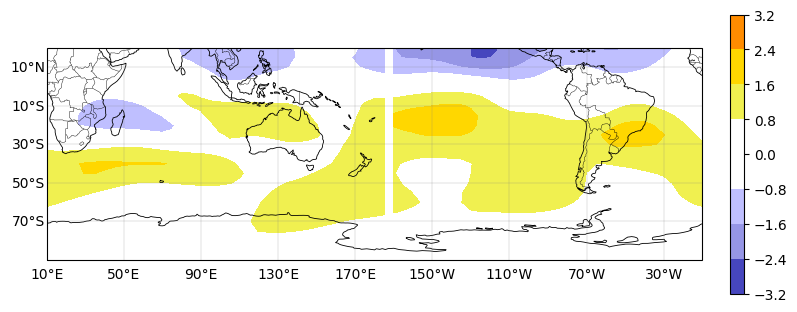

In [83]:
mes_1 = ensemble.sel(month=12)

lats = 20
latn = -110
lon1 = 160  
lon2 = -180   

plt.figure(figsize=[9,6])                            

proj = ccrs.PlateCarree(central_longitude=190)    

ax = plt.axes(projection=proj)   

ax.set_extent([lon1, lon2, lats, latn], proj)  

ax.coastlines( color='black',linewidth=0.6)

ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.3)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
                  xlocs=np.arange(-150,180,40), ylocs=np.arange(-90, 40,20), 
                  x_inline=False, y_inline=False, linewidth=0.33, color='gray',alpha=0.5)


interval = 0.8
levels = np.arange(-3.2,4,interval)


cf = ax.contourf(fim.longitude,fim.latitude, fim*1e-7, levels=levels, cmap = cmap)
cb2=plt.colorbar(cf,fraction=0.02,ticks=levels, pad=0.04)



gl.right_labels = False
gl.top_labels = False
